## SNODAS processing and data presentation
This notebook uses data and files that are not available in this data repository. As a result, this notebook cannot be run without editing. The following data can be found from other sources:

* Root zone storage (https://www.hydroshare.org/resource/ee45c2f5f13042ca85bcb86bbfc9dd37/)
* SNODAS (https://nsidc.org/data/g02158)

Intermediate data products including:

* 10, 25, 50, 75, and 90th percentile of April 1 SWE across contiguous USA

can be found on the hydroshare site for this study: https://www.hydroshare.org/resource/4b940b8593a4416e954a47bbbc58c568/

## Q/A SNODAS data download

In [34]:
# check that all data has been downloaded properly

months = ['01_Jan','02_Feb','03_Mar','04_Apr','05_May','06_Jun',
                     '07_Jul','08_Aug','09_Sep','10_Oct','11_Nov','12_Dec']
datanum_swe = {y:[] for y in range(2003,2022)}
datanum_snowmelt = {y:[] for y in range(2003,2022)}
datanum_sub = {y:[] for y in range(2003,2022)}
datanum_precip = {y:[] for y in range(2003,2022)}

import os
voldir = '/Volumes/Seagate One Touch HDD Media/SNODAS/'
for y in datanum_swe.keys():
    print(y)
    for m in months:
        try:
            files = os.listdir(voldir+str(y)+'/'+m)
        except:
            print('no',m,'in',y)
            continue
        files = [f for f in files if not f.endswith('tar')]
        files = [f for f in files if not f.endswith('txt')]
        num_swe = len([f for f in files if '1034' in f])
        num_snowmelt = len([f for f in files if '1044' in f])
        num_sub = len([f for f in files if '1050' in f])
        num_precip = len([f for f in files if ('1025' in f) 
                         & (str(y)+'1025' not in f)])/2
        datanum_swe[y].append(num_swe)
        datanum_snowmelt[y].append(num_snowmelt)
        datanum_sub[y].append(num_sub)
        datanum_precip[y].append(num_precip)

2003
no 01_Jan in 2003
no 02_Feb in 2003
no 03_Mar in 2003
no 04_Apr in 2003
no 05_May in 2003
no 06_Jun in 2003
no 07_Jul in 2003
no 08_Aug in 2003
no 09_Sep in 2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
no 10_Oct in 2021
no 11_Nov in 2021
no 12_Dec in 2021


In [38]:
datanum_precip

{2003: [2.0, 1.0, 0.0],
 2004: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 2005: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 2006: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 2007: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 2008: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 2009: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 2010: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 2011: [1.0, 0.0, 0.0, 0.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 2012: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 2013: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 2014: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 2015: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 2016: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 2017: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 2018: [1.

## Get basin mean SWE for each study site on each date--this section is not meant to be run by others

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
%config InlineBackend.figure_format='retina'
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

In [103]:
import geopandas as gpd
# bring in watershed boundaries
bdata1 = gpd.read_file('california_site_watershed_boundaries.shp')

In [104]:
import pickle5
# bring in raster pixel locations in SWE rasters where the basins are located
with open('rowsin_final.pkl', 'rb') as handle:
    rowsin = pickle5.load(handle)
with open('colsin_final.pkl', 'rb') as handle:
    colsin = pickle5.load(handle)
bdata1['rows_in'] = rowsin
bdata1['cols_in'] = colsin

In [106]:

import os
import pandas as pd
import numpy as np
# get the swe data for each basin
savedata_swe = {'date':[], 'swe':[], 'sitenum':[]} # SWE
savedata_snowmelt = {'date':[],'snowmelt':[], 'sitenum':[]} #melt (don't use this product)
savedata_sub = {'date':[], 'sublimation':[], 'sitenum':[]} # sublimation (also don't use this product)

snodas_dir = '/Volumes/Seagate One Touch HDD Media/SNODAS/'

# loop through downloaded data to get all SWE
for directory in os.listdir(snodas_dir):
    if (directory.startswith('2')):
        if True:#(int(directory)>=2017):
            print(directory)
            for m in os.listdir(snodas_dir+directory):
                print(m)
                if not (m.startswith('.')) and not (m=='10_txt'):
                    data_files = os.listdir(snodas_dir+directory+'/'+m)
                    datfiles = [d for d in data_files if d.endswith('dat')]
                    txtfiles = [d for d in data_files if d.endswith('txt')]
                    datfile_swe = [d for d in datfiles if '1034' in d] # SWE
                    datfile_swe.sort()
                    txtfile_swe = [d for d in txtfiles if '1034' in d] # SWE
                    txtfile_swe.sort()
                    datfile_sub = [d for d in datfiles if '1050' in d] # sublimation
                    datfile_sub.sort()
                    txtfile_sub = [d for d in txtfiles if '1050' in d] # sublimation
                    txtfile_sub.sort()
                    datfile_snowmelt = [d for d in datfiles if '1044' in d] # melt
                    datfile_snowmelt.sort()
                    txtfile_snowmelt = [d for d in txtfiles if '1044' in d] # melt
                    txtfile_snowmelt.sort()

                    for i in range(len(datfile_swe)):
                        dfile = datfile_swe[i]
                        date = dfile[-19:-15]+'-'+dfile[-15:-13]+'-'+dfile[-13:-11]
                        x = np.fromfile(snodas_dir+directory+'/'+m+'/'+dfile, dtype='>i2')
                        x = np.where(x<0,np.nan,x)
                        meta = open(snodas_dir+directory+'/'+m+'/'+txtfile_swe[i],'r').readlines()
                        meta = [m.split() for m in meta[50:58]]
                        # # this needs to be run once but really slows down the computation to run it in the whole loop
#                         xres = float(meta[0][-1])
#                         yres = float(meta[1][-1])
#                         minx = float(meta[4][-1])
#                         maxx = float(meta[5][-1])
#                         miny = float(meta[6][-1])
#                         maxy = float(meta[7][-1])
#                         xnum = round((maxx-minx)/xres)
#                         ynum = abs(round((maxy-miny)/yres))
                        x = x.reshape(ynum,xnum)

                        for i in range(len(bdata1)):
                            sitenum = bdata1.iloc[i].SITE_NO
                            rs = bdata1.iloc[i].rows_in
                            cs = bdata1.iloc[i].cols_in
                            inds = [(rs[j],cs[j]) for j in range(len(rs))]
                            inds_array = np.moveaxis(np.array(inds),-1,0)

                            swe_basin = x[tuple(inds_array)]
                            swe_curr = np.nanmean(swe_basin)

                            savedata_swe['swe'].append(swe_curr)
                            savedata_swe['date'].append(date)
                            savedata_swe['sitenum'].append(sitenum)

                    for i in range(len(datfile_sub)):
                        dfile = datfile_sub[i]
                        date = dfile[-19:-15]+'-'+dfile[-15:-13]+'-'+dfile[-13:-11]
                        x = np.fromfile(snodas_dir+directory+'/'+m+'/'+dfile, dtype='>i2')
                        x = np.where(x<0,np.nan,x)
                        meta = open(snodas_dir+directory+'/'+m+'/'+txtfile_sub[i],'r').readlines()
                        meta = [m.split() for m in meta[50:58]]
    #                     xres = float(meta[0][-1])
    #                     yres = float(meta[1][-1])
    #                     minx = float(meta[4][-1])
    #                     maxx = float(meta[5][-1])
    #                     miny = float(meta[6][-1])
    #                     maxy = float(meta[7][-1])
    #                     xnum = round((maxx-minx)/xres)
    #                     ynum = abs(round((maxy-miny)/yres))
    
                        # reshape the data so that it's in a 2d array heatmap of snow
                        x = x.reshape(ynum,xnum)
                        
                        # grab all raster pixels that are in the basin and get the data for each data type
                        for i in range(len(bdata1)):
                            sitenum = bdata1.iloc[i].SITE_NO
                            rs = bdata1.iloc[i].rows_in
                            cs = bdata1.iloc[i].cols_in
                            inds = [(rs[j],cs[j]) for j in range(len(rs))]
                            inds_array = np.moveaxis(np.array(inds),-1,0)

                            sub_basin = x[tuple(inds_array)]
                            sub_curr = np.nanmean(sub_basin)

                            savedata_sub['sublimation'].append(sub_curr)
                            savedata_sub['date'].append(date)
                            savedata_sub['sitenum'].append(sitenum)

                    for i in range(len(datfile_snowmelt)):
                        dfile = datfile_snowmelt[i]
                        date = dfile[-19:-15]+'-'+dfile[-15:-13]+'-'+dfile[-13:-11]
                        x = np.fromfile(snodas_dir+directory+'/'+m+'/'+dfile, dtype='>i2')
                        x = np.where(x<0,np.nan,x)
                        meta = open(snodas_dir+directory+'/'+m+'/'+txtfile_snowmelt[i],'r').readlines()
                        meta = [m.split() for m in meta[50:58]]
    #                     xres = float(meta[0][-1])
    #                     yres = float(meta[1][-1])
    #                     minx = float(meta[4][-1])
    #                     maxx = float(meta[5][-1])
    #                     miny = float(meta[6][-1])
    #                     maxy = float(meta[7][-1])
    #                     xnum = round((maxx-minx)/xres)
    #                     ynum = abs(round((maxy-miny)/yres))
                        # reshape data to correct shape
                        x = x.reshape(ynum,xnum)

                        # I think this is just duplicating data (oops), but it won't affect means
                        # especially since I dropped duplicates before calculating anything later
                        for i in range(len(bdata1)):
                            sitenum = bdata1.iloc[i].SITE_NO
                            rs = bdata1.iloc[i].rows_in
                            cs = bdata1.iloc[i].cols_in
                            inds = [(rs[j],cs[j]) for j in range(len(rs))]
                            inds_array = np.moveaxis(np.array(inds),-1,0)

                            snowmelt_basin = x[tuple(inds_array)]
                            snowmelt_curr = np.nanmean(snowmelt_basin)

                            savedata_snowmelt['snowmelt'].append(snowmelt_curr)
                            savedata_snowmelt['date'].append(date)
                            savedata_snowmelt['sitenum'].append(sitenum)
                        

# save data as csv files
savedata_swe = pd.DataFrame.from_dict(savedata_swe)
savedata_sub = pd.DataFrame.from_dict(savedata_sub)
savedata_snowmelt = pd.DataFrame.from_dict(savedata_snowmelt)

savedata_swe.to_csv(snodas_dir+'swe_data_basins1.csv')
savedata_sub.to_csv(snodas_dir+'sublimation_data_basins1.csv')
savedata_snowmelt.to_csv(snodas_dir+'snowmelt_data_basins1.csv')

2003
.DS_Store
10_Oct


<ipython-input-106-4d144aa92df8>:90: RuntimeWarning: Mean of empty slice
  sub_curr = np.nanmean(sub_basin)
<ipython-input-106-4d144aa92df8>:121: RuntimeWarning: Mean of empty slice
  snowmelt_curr = np.nanmean(snowmelt_basin)


10_txt
11_Nov
12_Dec
2004
.DS_Store
01_Jan
02_Feb
03_Mar
04_Apr
05_May
06_Jun
07_Jul
08_Aug
09_Sep
10_Oct
11_Nov
12_Dec
2005
.DS_Store
01_Jan
02_Feb
03_Mar
04_Apr
05_May
06_Jun
07_Jul
08_Aug
09_Sep
10_Oct
11_Nov
12_Dec
2006
.DS_Store
01_Jan
02_Feb
03_Mar
04_Apr
05_May
06_Jun
07_Jul
08_Aug
09_Sep
10_Oct
11_Nov
12_Dec
2007
.DS_Store
01_Jan
02_Feb
03_Mar
04_Apr
05_May
06_Jun
07_Jul
08_Aug
09_Sep
10_Oct
11_Nov
12_Dec
2008
.DS_Store
01_Jan
02_Feb
03_Mar
04_Apr
05_May
06_Jun
07_Jul
08_Aug
09_Sep
10_Oct
11_Nov
12_Dec
2009
.DS_Store
01_Jan
02_Feb
03_Mar
04_Apr
05_May
06_Jun
07_Jul
08_Aug
09_Sep
10_Oct
11_Nov
12_Dec
2010
.DS_Store
01_Jan
02_Feb
03_Mar
04_Apr
05_May
06_Jun
07_Jul
08_Aug
09_Sep
10_Oct
11_Nov
12_Dec
2011
.DS_Store
01_Jan
02_Feb
03_Mar
04_Apr
05_May
06_Jun
07_Jul
08_Aug
09_Sep
10_Oct
11_Nov
12_Dec
2012
.DS_Store
01_Jan
02_Feb
03_Mar
04_Apr
05_May
06_Jun
07_Jul
08_Aug
09_Sep
10_Oct
11_Nov
12_Dec
2013
.DS_Store
01_Jan
02_Feb
03_Mar
04_Apr
05_May
06_Jun
07_Jul
08_Aug
09_Sep
10_Oct
11_

In [107]:
# drop duplicates before saving the outputs that will actually be used

savedata_swe = savedata_swe.drop_duplicates()
savedata_sub = savedata_sub.drop_duplicates()
savedata_snowmelt = savedata_snowmelt.drop_duplicates()
savedata_swe.to_csv(snodas_dir+'swe_data_basins1.csv')
savedata_sub.to_csv(snodas_dir+'sublimation_data_basins1.csv')
savedata_snowmelt.to_csv(snodas_dir+'snowmelt_data_basins1.csv')

In [108]:
# combine all these data into one dataframe
savedata = savedata_swe.merge(savedata_sub,left_on=['date','sitenum'],
                   right_on=['date','sitenum']).merge(savedata_snowmelt,
                                                     left_on=['date','sitenum'],
                                                     right_on=['date','sitenum'])

In [109]:
# save all SNODAS summary data as one csv file
savedata = savedata.to_csv(snodas_dir+'snodas_basin_data1.csv',index=False)

## Get gridded SNODAS over all of California for April 1 each year

In [119]:
# look only at Apr 1 data but all over the Sierra

import os
import pandas as pd
import numpy as np
# get the swe data for each basin
apr1_swe = {str(y):0 for y in list(range(2004,2022))}

snodas_dir = '/Volumes/Seagate One Touch HDD Media/SNODAS/'

for directory in os.listdir(snodas_dir):
    if (directory.startswith('2')):
        if (int(directory)>=2004):
            print(directory)
            for m in ['04_Apr/']:
                print(m)
                if not (m.startswith('.')) and not (m=='10_txt'):
                    data_files = os.listdir(snodas_dir+directory+'/'+m)
                    datfiles = [d for d in data_files if d.endswith('dat')]
                    txtfiles = [d for d in data_files if d.endswith('txt')]
                    datfile_swe = [d for d in datfiles if '1034' in d]
                    datfile_swe.sort()
                    txtfile_swe = [d for d in txtfiles if '1034' in d]
                    txtfile_swe.sort()
                    datfile_swe = datfile_swe[:1]
                    txtfile_swe = txtfile_swe[:1]


                    for i in range(len(datfile_swe)):
                        dfile = datfile_swe[i]
                        date = dfile[-19:-15]+'-'+dfile[-15:-13]+'-'+dfile[-13:-11]
                        x = np.fromfile(snodas_dir+directory+'/'+m+'/'+dfile, dtype='>i2')
                        x = np.where(x<0,np.nan,x)
                        meta = open(snodas_dir+directory+'/'+m+'/'+txtfile_swe[i],'r').readlines()
                        meta = [m.split() for m in meta[50:58]]
#                         xres = float(meta[0][-1])
#                         yres = float(meta[1][-1])
#                         minx = float(meta[4][-1])
#                         maxx = float(meta[5][-1])
#                         miny = float(meta[6][-1])
#                         maxy = float(meta[7][-1])
#                         xnum = round((maxx-minx)/xres)
#                         ynum = abs(round((maxy-miny)/yres))
                        x = x.reshape(ynum,xnum)
                        apr1_swe[directory] = x



2004
04_Apr/
2005
04_Apr/
2006
04_Apr/
2007
04_Apr/
2008
04_Apr/
2009
04_Apr/
2010
04_Apr/
2011
04_Apr/
2012
04_Apr/
2013
04_Apr/
2014
04_Apr/
2015
04_Apr/
2016
04_Apr/
2017
04_Apr/
2018
04_Apr/
2019
04_Apr/
2020
04_Apr/
2021
04_Apr/


In [130]:
# get 10, 25, 50, 75, 90 percentile of April 1 SWE gridded over all of CA

# median_all = np.nanmedian([apr1_swe[y] for y in apr1_swe.keys()],axis=0)
# p25_all = np.nanpercentile([apr1_swe[y] for y in apr1_swe.keys()],25,axis=0)
# print('25 done')
p75_all = np.nanpercentile([apr1_swe[y] for y in apr1_swe.keys()],75,axis=0)
print('75 done')
p10_all = np.nanpercentile([apr1_swe[y] for y in apr1_swe.keys()],10, axis=0)
print('10 done')
p90_all = np.nanpercentile([apr1_swe[y] for y in apr1_swe.keys()],90, axis=0)
print('90 done')
# im = plt.imshow(median_all,vmin=0,vmax=2000)
# plt.colorbar(im)
# plt.ylim(2500,1000)
# plt.xlim(0,1000)
# plt.title(y)
# plt.show()

75 done
10 done
90 done


In [132]:
# save the data

import pickle
with open('median_apr1_swe.pkl', 'wb') as handle:
    pickle.dump(median_all, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('p25_apr1_swe.pkl', 'wb') as handle:
    pickle.dump(p25_all, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('p75_apr1_swe.pkl', 'wb') as handle:
    pickle.dump(p75_all, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('p10_apr1_swe.pkl', 'wb') as handle:
    pickle.dump(p10_all, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('p90_apr1_swe.pkl', 'wb') as handle:
    pickle.dump(p90_all, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Map relative size of deficit and SWE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
%config InlineBackend.figure_format='retina'
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

In [2]:
# import the maps of median, 25 perc, 75 perc April 1 SWE

import pickle
with open ('median_apr1_swe.pkl','rb') as handle:
    median_all = pickle.load(handle)
with open ('p25_apr1_swe.pkl','rb') as handle:
    p25_all = pickle.load(handle)
with open ('p75_apr1_swe.pkl','rb') as handle:
    p75_all = pickle.load(handle)

In [2]:
# import raster of maximum root zone storage calculated by Dralle et al., 2021
data_name = '/Volumes/Seagate One Touch HDD Media/S_Rootzone_Dralle_et_al_2021/S_R_withSnow.tif'
import numpy as np
from osgeo import gdal
ds = gdal.Open(data_name)
myarray = np.array(ds.GetRasterBand(1).ReadAsArray())

In [5]:
# bring in the outline of th Sierra
import geopandas as gpd
sierra = gpd.read_file('sierra_outline/SNC_Boundary.shp').to_crs(epsg=4326)

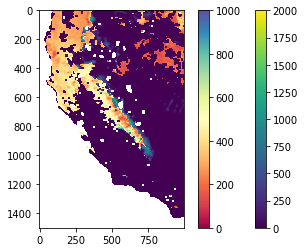

In [14]:
# take subsets of the full map (continental US) to narrow down to CA

import matplotlib.pyplot as plt
%matplotlib inline

median_all_sub = median_all[1000:2500]
median_all_sub = [m[:1000] for m in median_all_sub]
median_all_sub = np.array([np.array(m) for m in median_all_sub])

p25_all_sub = p25_all[1000:2500]
p25_all_sub = [m[:1000] for m in p25_all_sub]
p25_all_sub = np.array([np.array(m) for m in p25_all_sub])

p75_all_sub = p75_all[1000:2500]
p75_all_sub = [m[:1000] for m in p75_all_sub]
p75_all_sub = np.array([np.array(m) for m in p75_all_sub])

im =plt.imshow(p75_all_sub,vmin=0,vmax=2000)
plt.colorbar(im)

rz_data_sub = myarray[2950:4450]
rz_data_sub = [m[6050:7050] for m in rz_data_sub]
rz_data_sub = np.array([np.array(m) for m in rz_data_sub])

# plot just to see where data are and how well they line up
im1 = plt.imshow(rz_data_sub,vmin=0,vmax=1000,cmap='Spectral')
plt.colorbar(im1)

<AxesSubplot:>

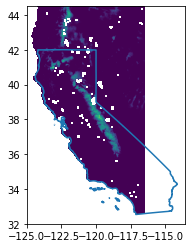

In [16]:
# bring in outline of CA and make sure everything is lining up properly

# import geopandas as gpd
# us_outline = gpd.read_file('../WISC/NaturalCommunity/US_state_outline/cb_2018_us_state_500k.shp').to_crs(epsg=4326)
fig,ax = plt.subplots(1)
ax.imshow(p75_all_sub,vmin=0,vmax=2000,extent=(-125,-116.5,32,44.5))
us_outline[us_outline.STUSPS=='CA'].boundary.plot(ax=ax)

<ipython-input-47-88c574ae928f>:18: RuntimeWarning: divide by zero encountered in true_divide
  compare = rz_data_sub/snodas_summary
<ipython-input-47-88c574ae928f>:18: RuntimeWarning: invalid value encountered in true_divide
  compare = rz_data_sub/snodas_summary
<ipython-input-47-88c574ae928f>:18: RuntimeWarning: divide by zero encountered in true_divide
  compare = rz_data_sub/snodas_summary
<ipython-input-47-88c574ae928f>:18: RuntimeWarning: invalid value encountered in true_divide
  compare = rz_data_sub/snodas_summary
<ipython-input-47-88c574ae928f>:18: RuntimeWarning: divide by zero encountered in true_divide
  compare = rz_data_sub/snodas_summary
<ipython-input-47-88c574ae928f>:18: RuntimeWarning: invalid value encountered in true_divide
  compare = rz_data_sub/snodas_summary


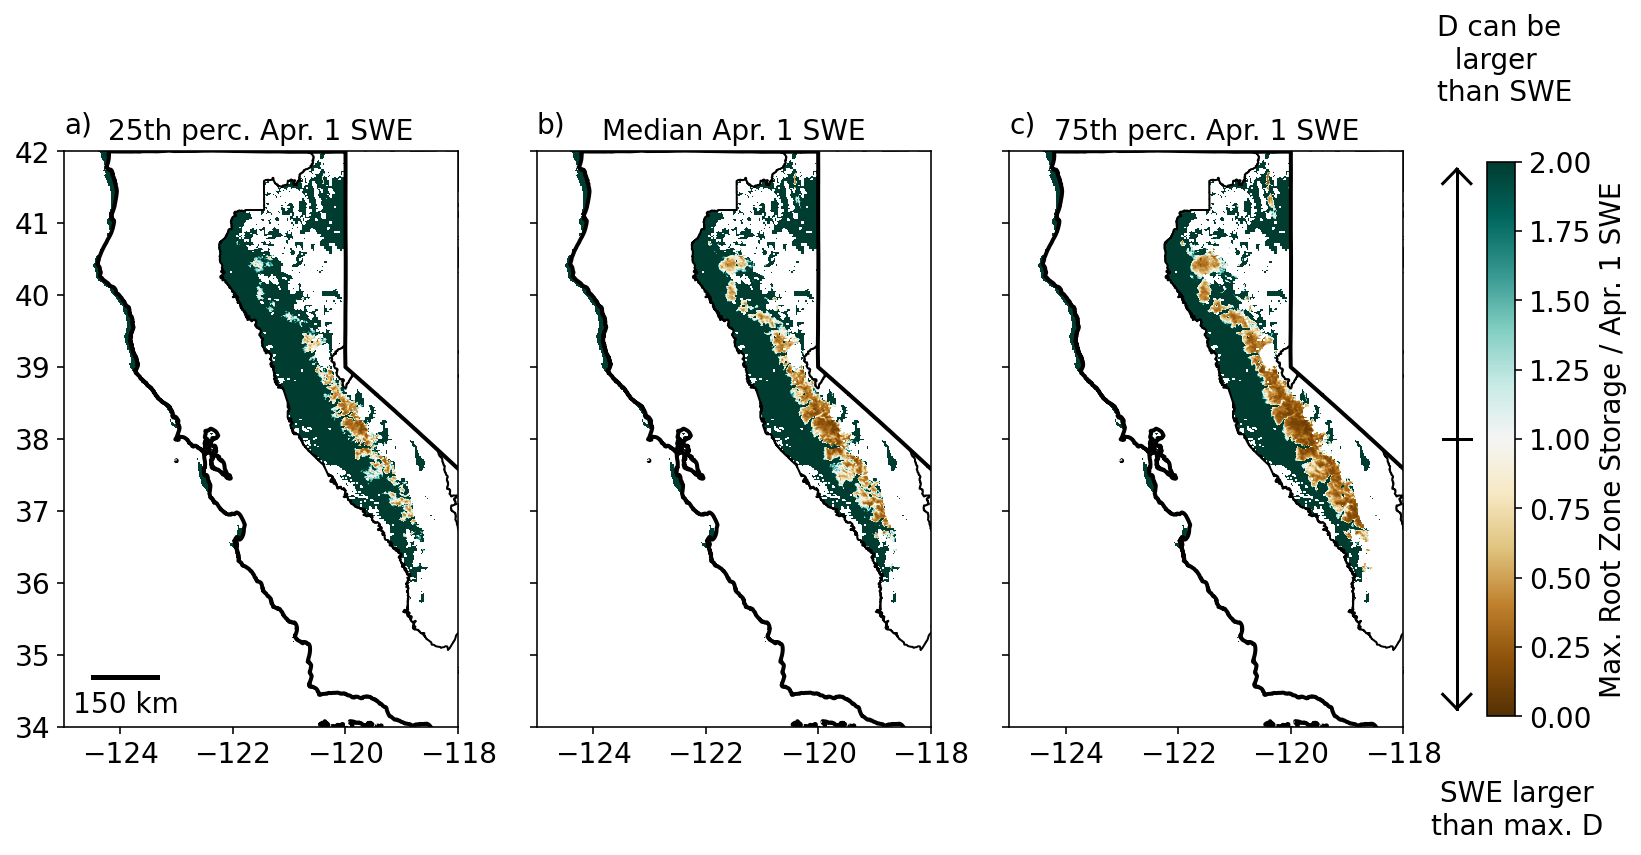

In [47]:
# Map ratio between April 1 SWE and maximum deficit only in the Sierra for 25, 50, 75th percentile of April 1 SWE

from matplotlib_scalebar.scalebar import ScaleBar
from shapely.geometry.point import Point
%config InlineBackend.figure_format='retina'
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

points = gpd.GeoSeries([Point(-123,35), Point(-124, 35)], crs=4326)  # Geographic WGS 84 - degrees
points = points.to_crs(32619) # Projected WGS 84 - meters
distance_meters = points[0].distance(points[1])

fig,axs = plt.subplots(1,3,figsize = (15,6),sharey=True)

i=0
titles = ['25th perc. Apr. 1 SWE','Median Apr. 1 SWE','75th perc. Apr. 1 SWE']
labels = ['a)','b)','c)']
for snodas_summary in [p25_all_sub,median_all_sub,p75_all_sub]:
    ax = axs[i]
    compare = rz_data_sub/snodas_summary
    compare = np.where(compare>100,100,compare)
    im = ax.imshow(compare,vmin = 0,vmax=2.,cmap='BrBG',#'Spectral',
                   extent=(-124.9,-116.5,32,44.5))
    ax.set_title(titles[i],fontsize = 14)
    ax.set_ylim(34,42)
    ax.set_xlim(-125,-118)
    ax.text(-125,42.25,labels[i])
#     ax.fill_between([-123.5,-121],[42.5,38],[36,36],facecolor='white')
#     ax.axvspan(-125,-123,facecolor = 'white')
#     ax.axhspan(32,36,facecolor = 'white')
    nonoverlap = (((us_outline[us_outline.STUSPS=='CA'].geometry.values[0]).symmetric_difference(sierra.geometry.values[0])).difference(sierra.geometry.values[0]))
    for geom in nonoverlap.geoms:    
        xs, ys = geom.exterior.xy    
        ax.fill(xs, ys, fc='white', ec='none')
    us_outline[us_outline.STUSPS=='CA'].boundary.plot(ax=ax,edgecolor = 'k',lw=2)  
    us_outline[us_outline.STUSPS=='NV'].plot(ax=ax,facecolor = 'white')
    sierra.boundary.plot(ax=ax,edgecolor = 'k',lw=1)
    i+=1

axs[0].add_artist(ScaleBar(distance_meters,location='lower left'))
cbar = fig.colorbar(im, ax=axs.ravel().tolist(), shrink=0.85)
cbar.set_label('Max. Root Zone Storage / Apr. 1 SWE')

ax = axs[2]
ax.text(-117.4,42.7,'D can be\n  larger\nthan SWE')
ax.text(-117.5,32.5,' SWE larger\nthan max. D')
ax.plot([-116.8,-117.3],[38,38],c='k',clip_on=False)
ax.plot([-117.05,-117.05],[34.25,41.75],c='k',clip_on=False)
ax.plot([-117.05,-117.3],[34.25,34.45],c='k',clip_on=False)
ax.plot([-117.05,-116.8],[34.25,34.45],c='k',clip_on=False)
ax.plot([-117.05,-117.3],[41.75,41.55],c='k',clip_on=False)
ax.plot([-117.05,-116.8],[41.75,41.55],c='k',clip_on=False)

plt.savefig('deficit_vs_swe.pdf',format='pdf',dpi=300,bbox_inches='tight')

Text(0.5, 0, 'Max. Root Zone Storage deficit / 10th percentile April 1 SWE')

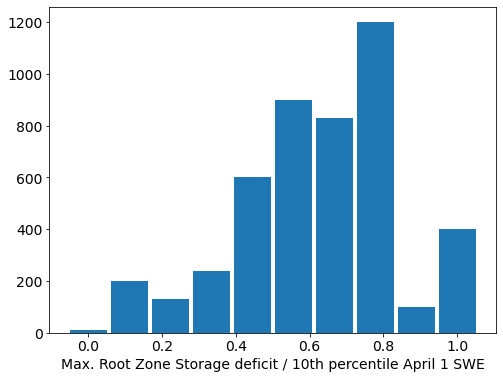

In [87]:
# make a histogram of ratios


plt.rcParams.update({'font.size': 14})
# %matplotlib inline
fig,ax = plt.subplots(1,figsize = (8,6))
xvals = np.linspace(0,1,10)
yvals = [1000,800,500,600,300,100,120,10,0,4]
yvals1 = [10,200,400,900,400,200,20,0,5,0]
yvals2 = [10,200,130,240,600,900,830,1200,100,400]
# plt.bar(xvals,yvals,width = 100,label = 'Max. Root Zone Storage Deficit (mm)',alpha=0.5)
# plt.bar(xvals,yvals1,width=100,label='10th percentile April 1 SWE (mm)',alpha=0.5)
ax.bar(xvals,yvals2,width=0.1)
ax.set_xlabel('Max. Root Zone Storage deficit / 10th percentile April 1 SWE')
aax.set_ylabel('Fraction of')